## 1 - Importing, Labelling and Ordering

In [1]:
# Importing the Data

import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
# Set the ID as the Index

df2 = df.set_index("id")

# Get the index (id) of a Random no
df2.name[2539]

'Clean & quiet apt home by the park'

In [4]:
# Grouping the Data

df3 = df.groupby("room_type").mean()
df3

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


In [5]:
# Reset the Index and Drop the Current Index Value
df3.reset_index(drop=True)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
1,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
2,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


#### Sorting

In [6]:
df3.sort_index(ascending=False)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304


In [7]:
# Sort Neighborhood and host name in order in df dataframe

df.sort_values(["neighbourhood_group", "host_name"], ascending=[False, True], inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4079,2611458,close to Manhattan country setting,13373889,Aaron,Staten Island,Concord,40.60375,-74.08065,Private room,129,1,40,2018-10-14,0.85,2,86
16714,13370393,Charming.,13373889,Aaron,Staten Island,Concord,40.60556,-74.08274,Entire home/apt,150,7,1,2018-11-04,0.12,2,83
24922,19970350,Newly renovated clean and Cozy Private room,15344412,Abe,Staten Island,New Springville,40.58085,-74.15443,Private room,43,10,0,NaN,NaN,3,89


In [8]:
# Get the Unique Neighborhood Value

df.neighbourhood_group.unique()

array(['Staten Island', 'Queens', 'Manhattan', 'Brooklyn', 'Bronx'],
      dtype=object)

In [9]:
# Get their Value Counts

df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Rank

Like sorting, but with collision detection.

In [10]:
# Sort by Price and Give them Rank

dfp = df.sort_values("price", ascending=False)
dfp[["id", "host_name", "price"]].head(5)

,id,host_name,price
9151,7003697,Kathrine,10000
17692,13894339,Erin,10000
29238,22436899,Jelena,10000
12342,9528920,Amy,9999
40433,31340283,Matt,9999


In [19]:
dfp["price_rank_max"] = dfp.price.rank(method="max", ascending=False)
dfp["price_rank_min"] = dfp.price.rank(method="min", ascending=False)
dfp["price_rank_avg"] = dfp.price.rank(method="average", ascending=False)
dfp["price_rank_dense"] = dfp.price.rank(method="dense", ascending=False)
dfp["price_rank_first"] = dfp.price.rank(method="first", ascending=False)

In [20]:
dfp[["id", "host_name", "price", "price_rank_max", "price_rank_min","price_rank_avg","price_rank_dense", "price_rank_first"]].head(5)

,id,host_name,price,price_rank_max,price_rank_min,price_rank_avg,price_rank_dense,price_rank_first
9151,7003697,Kathrine,10000,3.0,1.0,2.0,1.0,1.0
17692,13894339,Erin,10000,3.0,1.0,2.0,1.0,2.0
29238,22436899,Jelena,10000,3.0,1.0,2.0,1.0,3.0
12342,9528920,Amy,9999,6.0,4.0,5.0,2.0,4.0
40433,31340283,Matt,9999,6.0,4.0,5.0,2.0,5.0


## 2 - Slicing and Filtering

In [21]:
# We use Airbnb Data here

import pandas as pd
import numpy as np

df = pd.read_csv("AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [22]:
# Slicing 2 Columns

df[["host_name", "neighbourhood_group"]]

,host_name,neighbourhood_group
0,John,Brooklyn
1,Jennifer,Manhattan
2,Elisabeth,Manhattan
3,LisaRoxanne,Brooklyn
4,Laura,Manhattan
...,...,...
48890,Sabrina,Brooklyn
48891,Marisol,Brooklyn
48892,Ilgar & Aysel,Manhattan
48893,Taz,Manhattan


In [23]:
# Mask Filtering

df[df.host_name == "Taz"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31463,24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
31517,24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325
37598,29827403,“TIME SQUARE” 43rd Street\nBig Bedroom on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75988,-73.99123,Private room,135,1,50,2019-07-07,6.20,6,316
37615,29831106,TIME SQUARE” 43rd street\nPrivate room on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75938,-73.98986,Private room,145,1,61,2019-07-06,7.50,6,283
37795,29929331,“TIME SQUARE” 43rd street SINGLE BED,30985759,Taz,Manhattan,Hell's Kitchen,40.75964,-73.99002,Shared room,70,1,59,2019-07-04,7.47,6,314
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [24]:
# Sum via Mask Filtering

(df.host_name == "Taz").sum()

6

In [25]:
# Also Try Mask for Boolean Value
mask = df.host_name == "Taz"
df[mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31463,24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
31517,24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325


In [27]:
# Multiple Filterings - Get Cheap and Quick Airbnb Listings - AND Operator

quick_and_cheap = (df.price < 100) & (df.minimum_nights < 3)
print(quick_and_cheap.sum())
df[quick_and_cheap].head(2)

12129


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [32]:
# Multiple Filterings - Get Reviews Airbnb Listings - OR Operator

reviews_consistent = df[(df.reviews_per_month > 3) | (df.number_of_reviews > 50)]
reviews_consistent.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [33]:
# Multiple Filtering Using Numpy OR Operator

mask = np.logical_or((df.reviews_per_month > 3), (df.number_of_reviews > 50))
df[mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [34]:
# Get Values opposite to the Above

df[~mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


#### Filtering Rows and Columns

In [35]:
# Get Name and Hostname from the Masked Data

df.loc[mask, ["name", "host_name"]]

,name,host_name
3,Cozy Entire Floor of Brownstone,LisaRoxanne
5,Large Cozy 1 BR Apartment In Midtown East,Chris
7,Large Furnished Room Near B'way,Shunichi
8,Cozy Clean Guest Room - Family Apt,MaryEllen
9,Cute & Cozy Lower East Side 1 bdrm,Ben
...,...,...
47848,Penn House~~~~5 mins from JFK,Penn
47967,Cosy Bedroom in the Heart of Manhattan,Dayana
48031,Large bedroom with private bathroom is suit,Alex And Mila
48228,1910 Original Rockaway Bungalow,Diana


In [36]:
# Get all values from the Masked Data

df.loc[mask, :].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [37]:
# Filter Based on Index

df2 = df.set_index("id")

# Check for Index 10
df2.iloc[10, :]

name                              Beautiful 1br on Upper West Side
host_id                                                       7702
host_name                                                     Lena
neighbourhood_group                                      Manhattan
neighbourhood                                      Upper West Side
latitude                                                   40.8032
longitude                                                 -73.9655
room_type                                          Entire home/apt
price                                                          135
minimum_nights                                                   5
number_of_reviews                                               53
last_review                                             2019-06-22
reviews_per_month                                             0.43
calculated_host_listings_count                                   1
availability_365                                              

### Mask Helpers

In [38]:
# using Between Function - Gets the Value Between 100 and 200

df.loc[df.price.between(100, 200), "price"].head()

0     149
2     150
5     200
9     150
10    135
Name: price, dtype: int64

In [39]:
# Using isin Function - Gets the Value if the Value is 100 or 200

df.loc[df.price.isin([100, 200]), "price"].head()

5     200
54    200
63    200
76    200
94    100
Name: price, dtype: int64

In [40]:
# Get Boolean output if any value contains the Keyword

(df == "John").any()

D:\Anaconda\envs\py36\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

#### Know between Views vs Copy, For copying a Dataframe (Deep and Shallow Copy)

## 3 - Replacing and Thresholding

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [42]:
# Dealing with NAN by info Method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [43]:
# Drop by Particulat Column - Drop last_review

df.dropna(subset=["last_review"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [44]:
# Fill All missing values with 0

df.fillna(0);

### Replacing - Generic Replace

In [45]:
df.replace("John", "Jono").head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [46]:
# Replace Multiple Words 

df.replace({"John": "Jono", "Brooklyn": "Brooky"}).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooky,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


#### Thresholding

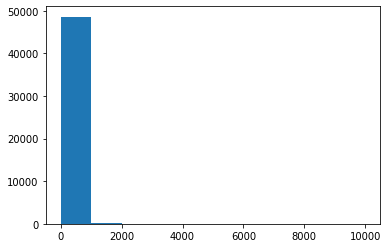

In [47]:
import matplotlib.pyplot as plt
plt.hist(df.price);

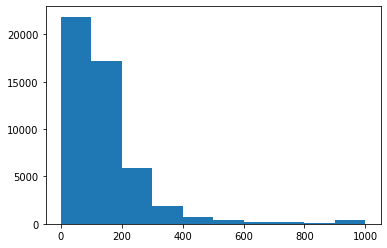

In [48]:
# Provide Upper Cap - Those with >1000 will be replaced as 1000

plt.hist(df.price.clip(upper=1000));

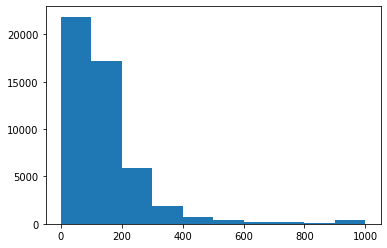

In [49]:
# Doing the Above Manually

df2 = df.copy()
df2.loc[df2.price > 1000, "price"] = 1000
plt.hist(df2.price);

## 4 - Removing and Adding Data

Let's mix it up a bit and change our data source. Now we'll look at some astronauts!
https://www.kaggle.com/nasa/astronaut-yearbook

In [61]:
import pandas as pd

df = pd.read_csv("astronauts.csv")
df.head(1)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN


In [62]:
# Modify the Date Column to Timeseries one

birthdate = pd.to_datetime(df["Birth Date"], format="%m/%d/%Y")
birthdate

0     1967-05-17
1     1936-03-07
2     1946-03-03
3     1951-05-20
4     1930-01-20
         ...    
352   1956-08-23
353   1962-07-26
354   1932-02-07
355   1930-09-24
356   1962-06-29
Name: Birth Date, Length: 357, dtype: datetime64[ns]

In [63]:
# Get only the Years

birthdate.dt.year

0      1967
1      1936
2      1946
3      1951
4      1930
       ... 
352    1956
353    1962
354    1932
355    1930
356    1962
Name: Birth Date, Length: 357, dtype: int64

In [64]:
# Perform Date Operations

today = pd.to_datetime("2020-06-08")
df["age_today"] = (today - birthdate).astype('timedelta64[Y]')
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_today
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,53.0
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,84.0
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,74.0


In [65]:
# Add Birthdate

df["birth"] = birthdate
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_today,birth
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,53.0,1967-05-17
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,84.0,1936-03-07
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,74.0,1946-03-03


#### Categoricals
Information can be utilised by other libraries that pandas interfaces with, you can provide explicit sorting order rathen than lexical order, and huge speed improvements if you group on categories.

In [66]:
print(df["Military Rank"].dtype)
df["Military Rank"].unique()

object


array([nan, 'Colonel', 'Lieutenant Colonel', 'Captain', 'Major General',
       'Commander', 'Lieutenant Commander', 'Brigadier General', 'Major',
       'Lieutenant General', 'Chief Warrant Officer', 'Rear Admiral',
       'Vice Admiral'], dtype=object)

In [68]:
# Convert object to Category - Kind of Ordinal

df["Military Rank"] = df["Military Rank"].astype("category")

In [71]:
print(df["Military Rank"].dtype)

category


In [72]:
# Numeric/String Conversion

df.age_today.astype("str").astype("float").astype("int")[0]

53

In [73]:
# Removing the Columns and Rows

df2 = df[["Name", "Year", "Group"]].copy()
df2.head()

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0


In [74]:
# Drop Only Group
df2.drop("Group", axis=1).head()

,Name,Year
0,Joseph M. Acaba,2004.0
1,Loren W. Acton,NaN
2,James C. Adamson,1984.0
3,Thomas D. Akers,1987.0
4,Buzz Aldrin,1963.0


In [75]:
# Drop the Index at 1st Position

df2.drop(1).head()

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0
5,Andrew M. Allen,1987.0,12.0


In [76]:
# Drop 2 Values Column and Year

df2.drop(columns=["Year", "Group"]).head()

,Name
0,Joseph M. Acaba
1,Loren W. Acton
2,James C. Adamson
3,Thomas D. Akers
4,Buzz Aldrin


In [77]:
# Adding Rows to the Dataframe

df2.head()

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0


In [81]:
df2 = df2.append({"Name": "Ravi", "Year": 2020, "Group": 20.0}, ignore_index=True)
df2

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0
...,...,...,...
353,Neil W. Woodward III,1998.0,17.0
354,Alfred M. Worden,1966.0,5.0
355,John W. Young,1962.0,2.0
356,George D. Zamka,1998.0,17.0


In [82]:
# You can also append a Dataframe with Another

df_kris = pd.DataFrame({"Name": ["Krish"], "Year": [2019], "Group": [20.0]})
df_kris

,Name,Year,Group
0,Krish,2019,20.0


In [83]:
df2.append(df_kris, ignore_index=True)

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0
...,...,...,...
354,Alfred M. Worden,1966.0,5.0
355,John W. Young,1962.0,2.0
356,George D. Zamka,1998.0,17.0
357,Ravi,2020.0,20.0


In [84]:
# Add a Column with a String for All Observation

df2["Col1"] = "To Fill"
df2

,Name,Year,Group,Col1
0,Joseph M. Acaba,2004.0,19.0,To Fill
1,Loren W. Acton,NaN,NaN,To Fill
2,James C. Adamson,1984.0,10.0,To Fill
3,Thomas D. Akers,1987.0,12.0,To Fill
4,Buzz Aldrin,1963.0,3.0,To Fill
...,...,...,...,...
353,Neil W. Woodward III,1998.0,17.0,To Fill
354,Alfred M. Worden,1966.0,5.0,To Fill
355,John W. Young,1962.0,2.0,To Fill
356,George D. Zamka,1998.0,17.0,To Fill


In [85]:
# You can also use Assign Keyword

df2.assign(some_col="someval")

,Name,Year,Group,Col1,some_col
0,Joseph M. Acaba,2004.0,19.0,To Fill,someval
1,Loren W. Acton,NaN,NaN,To Fill,someval
2,James C. Adamson,1984.0,10.0,To Fill,someval
3,Thomas D. Akers,1987.0,12.0,To Fill,someval
4,Buzz Aldrin,1963.0,3.0,To Fill,someval
...,...,...,...,...,...
353,Neil W. Woodward III,1998.0,17.0,To Fill,someval
354,Alfred M. Worden,1966.0,5.0,To Fill,someval
355,John W. Young,1962.0,2.0,To Fill,someval
356,George D. Zamka,1998.0,17.0,To Fill,someval


In [86]:
# Get the First Name only from the Name

df2.insert(0, "FirstName", df.Name.str.split(" ", 1, expand=True)[0])
df2.head()

,FirstName,Name,Year,Group,Col1
0,Joseph,Joseph M. Acaba,2004.0,19.0,To Fill
1,Loren,Loren W. Acton,NaN,NaN,To Fill
2,James,James C. Adamson,1984.0,10.0,To Fill
3,Thomas,Thomas D. Akers,1987.0,12.0,To Fill
4,Buzz,Buzz Aldrin,1963.0,3.0,To Fill


In [87]:
# Perform Transposing Operation

df3 = df.set_index("Name")
df3.head(2)

,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_today,birth
Name,,,,,,,,,,,,,,,,,,,,
Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,53.0,1967-05-17
Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,84.0,1936-03-07


In [88]:
# Perform Transposing

df3.T

Name,Joseph M. Acaba,Loren W. Acton,James C. Adamson,Thomas D. Akers,Buzz Aldrin,Andrew M. Allen,Joseph P. Allen,Scott D. Altman,William A. Anders,Clayton C. Anderson,...,Sunita L. Williams,Barry E. Wilmore,Stephanie D. Wilson,G. Reid Wiseman,Peter J. K. Wisoff,David A. Wolf,Neil W. Woodward III,Alfred M. Worden,John W. Young,George D. Zamka
Year,2004,NaN,1984,1987,1963,1987,1967,1995,1963,1998,...,1998,2000,1996,2009,1990,1990,1998,1966,1962,1998
Group,19,NaN,10,12,3,12,6,15,3,17,...,17,18,16,20,13,13,17,5,2,17
Status,Active,Retired,Retired,Retired,Retired,Retired,Retired,Retired,Retired,Retired,...,Active,Active,Active,Active,Retired,Retired,Retired,Retired,Retired,Retired
Birth Date,5/17/1967,3/7/1936,3/3/1946,5/20/1951,1/20/1930,8/4/1955,6/27/1937,8/15/1959,10/17/1933,2/23/1959,...,9/19/1965,12/29/1962,9/27/1966,11/11/1975,8/16/1958,8/23/1956,7/26/1962,2/7/1932,9/24/1930,6/29/1962
Birth Place,"Inglewood, CA","Lewiston, MT","Warsaw, NY","St. Louis, MO","Montclair, NJ","Philadelphia, PA","Crawsfordsville, IN","Lincoln, IL",Hong Kong,"Omaha, NE",...,"Euclid, OH","Murfreesboro, TN","Boston, MA","Baltimore, MD","Norfolk, VA","Indianapolis, IN","Chicago, IL","Jackson, MI","San Francisco, CA","Jersey City, NJ"
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Female,Male,Male,Male,Male,Male,Male,Male
Alma Mater,University of California-Santa Barbara; Univer...,Montana State University; University of Colorado,US Military Academy; Princeton University,University of Missouri-Rolla,US Military Academy; MIT,Villanova University; University of Florida,DePauw University; Yale University,University of Illinois; US Naval Postgraduate ...,US Naval Academy; Air Force Institute of Techn...,Hastings College; Iowa State University,...,US Naval Academy; Florida Institute of Technology,Tennessee Technological University; University...,Harvard University; University of Texas,Rensselaer Polytechnic Institute; Johns Hopkin...,University of Virginia; Stanford University,Purdue University; Indiana University,MIT; University of Texas-Austin; George Washin...,US Military Academy; University of Michigan,Georgia Institute of Technology,US Naval Academy; Florida Institute of Technology
Undergraduate Major,Geology,Engineering Physics,Engineering,Applied Mathematics,Mechanical Engineering,Mechanical Engineering,Mathematics & Physics,Aeronautical & Astronautical Engineering,Nuclear Engineering,Physics,...,Physical Science,Electrical Engineering,Engineering Science,Computer & Systems Engineering,Physics,Electrical Engineering,Physics,Military Science,Aeronautical Engineering,Mathematics
Graduate Major,Geology,Solar Physics,Aerospace Engineering,Applied Mathematics,Astronautics,Business Administration,Physics,Aeronautical Engineering,Nuclear Engineering,Aerospace Engineering,...,Engineering Management,Electrical Engineering; Aviation Systems,Aerospace Engineering,Systems Engineering,Applied Physics,Medicine,Physics; Business Management,Aeronautical & Astronautical Engineering,NaN,Engineering Management
Military Rank,NaN,NaN,Colonel,Colonel,Colonel,Lieutenant Colonel,NaN,Captain,Major General,NaN,...,Captain,Captain,NaN,Commander,NaN,NaN,Commander,Colonel,Captain,Colonel


## 5 - Apply, Map and Vectorised Functions


In [97]:
# Create a Random Dataframe

import pandas as pd
import numpy as np

data = np.round(np.random.normal(size=(4, 3)), 2)
df = pd.DataFrame(data, columns=["A", "B", "C"])
df.head()

,A,B,C
0,-0.60,0.35,-0.70
1,0.39,-0.13,-0.44
2,1.38,0.69,-2.01
3,-0.87,-0.32,-0.43


### Apply
Used to execute an arbitrary function again an entire dataframe, or a subection. Applies in a vectorised fashion.

In [98]:
df.apply(lambda x: 1 + np.abs(x)) # We use Absolute Value function here

,A,B,C
0,1.60,1.35,1.70
1,1.39,1.13,1.44
2,2.38,1.69,3.01
3,1.87,1.32,1.43


In [99]:
# Apply Absolute Value only to A - Convert Negative to Positive Absolute Value
df.A.apply(np.abs)

0    0.60
1    0.39
2    1.38
3    0.87
Name: A, dtype: float64

In [100]:
# The Same above will be showcased as Function, But Increases only if the Value is Positive

def double_if_positive(x):
    x[x > 0] += 1
    return x

df.apply(double_if_positive)

,A,B,C
0,-0.60,1.35,-0.70
1,1.39,-0.13,-0.44
2,2.38,1.69,-2.01
3,-0.87,-0.32,-0.43


### Map
Similar to apply, but operators on Series, and uses dictionary based inputs rather than an array of values.

In [101]:
series = pd.Series(["Steve", "Alex", "Jess", "Mark"])
series

0    Steve
1     Alex
2     Jess
3     Mark
dtype: object

In [102]:
# Apply Map - Map only changes the Value Present and map others to Null
series.map({"Steve": "Stephen"})

0    Stephen
1        NaN
2        NaN
3        NaN
dtype: object

In [103]:
# You can use Map for FString

series.map(lambda d: f"I am {d}")

0    I am Steve
1     I am Alex
2     I am Jess
3     I am Mark
dtype: object

### Vectorised functions

In [104]:
# Display data and Absolute Data

display(df, df.abs())

,A,B,C
0,-0.60,1.35,-0.70
1,1.39,-0.13,-0.44
2,2.38,1.69,-2.01
3,-0.87,-0.32,-0.43


,A,B,C
0,0.60,1.35,0.70
1,1.39,0.13,0.44
2,2.38,1.69,2.01
3,0.87,0.32,0.43


In [105]:
# Add Series Value

series = pd.Series(["Obi-Wan Kenobi", "Luke Skywalker", "Han Solo", "Leia Organa"])
series

0    Obi-Wan Kenobi
1    Luke Skywalker
2          Han Solo
3       Leia Organa
dtype: object

In [106]:
# You Can Only Split Series by converting it first as string then applying split function

series.str.split(expand=True)

,0,1
0,Obi-Wan,Kenobi
1,Luke,Skywalker
2,Han,Solo
3,Leia,Organa


In [107]:
# Split the data and apply Upper, Multiple methods

series.str.upper().str.split()

0    [OBI-WAN, KENOBI]
1    [LUKE, SKYWALKER]
2          [HAN, SOLO]
3       [LEIA, ORGANA]
dtype: object

<b>Vectorising everything you can</b> is the key to speeding up your code. Once you've done that, you should use other tools to investigate. PyCharm Professional has a great optimisation tool built in. Jupyter has %lprun (line profiler) command you can find here: https://github.com/rkern/line_profiler